In [175]:
## importing relevant libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
sns.set_theme(color_codes = True)

In [176]:
os.getcwd()

'D:\\EE1Sem2 Course\\EE769 IML\\Project\\DataSet'

In [177]:
os.chdir('D:\\EE1Sem2 Course\\EE769 IML\\Project\\DataSet')

# Data Loading

In [178]:
df1 = pd.read_csv('training.csv')          ## reading data  
df1 = df1.drop(['Unnamed: 133'], axis = 1) ## drop the irrelevant column

In [179]:
df1

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
0     ...           0         0             0                    0   
1     ...           0         0             0                    0   
2     ...           0         0             0                    0   
3     ...           0         0             0                    0   
4     ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4915  ...           0         0             0                    0   
4916  ...           1         1             0                    0   
4917  ...           0         0             0                    0   
4918  ...           0         0             1                    1   
4919  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                        0                   0        0                     0   
1                        0                   0        0                     0   
2                        0                   0        0                     0   
3                        0                   0        0                     0   
4                        0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4915                     0                   0        0                     0   
4916                     0                   0        0                     0   
4917                     0                   0        0                     0   
4918                     1                   1        0                     0   
4919                     0                   0        1                     1   

      yellow_crust_ooze                                prognosis  
0                     0                         Fungal infection  
1                     0                         Fungal infection  
2                     0                         Fungal infection  
3                     0                         Fungal infection  
4                     0                    

In [180]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


# Data Preprocessing

In [181]:
print(df1.isna().sum())       ## gives null value in each columns
print(df1.isna().sum().sum()) ## gives null value in entire dataframe

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
0


In [182]:
df1['prognosis'].unique()  ## gives all names of the disease

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [183]:
df1.prognosis.value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

# Exploratory Data Analysis

In [184]:
X = df1.drop(['prognosis'], axis = 1) ## feature matrix
y = df1['prognosis']                  ## target variable

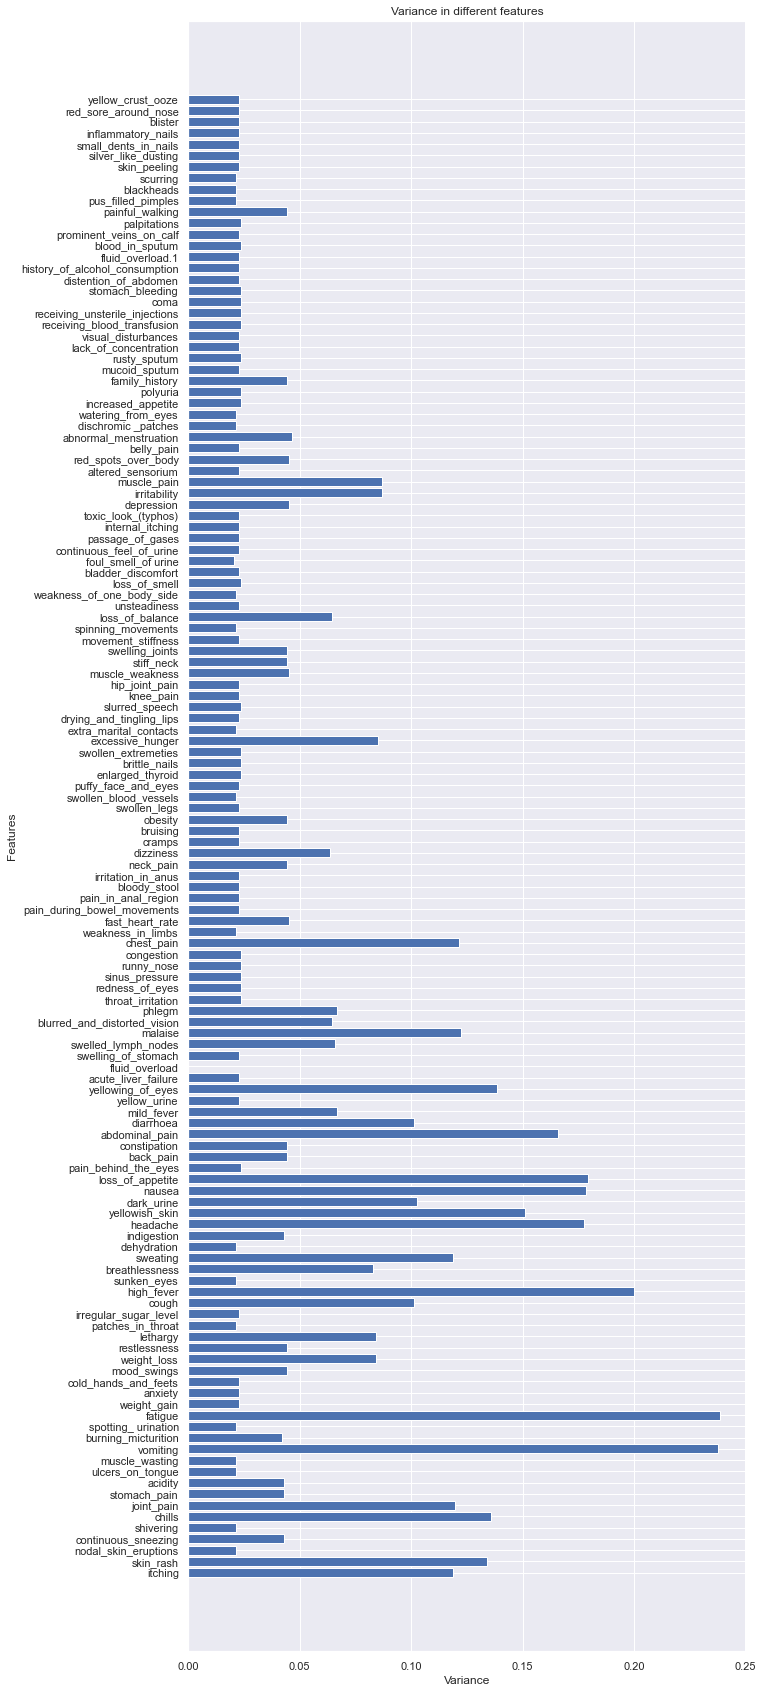

In [185]:
## calculating variance in different features

fig = plt.figure(figsize = (10,30))
variance = X.var()   ## calculates variance 
features = X.columns
plt.barh(features, variance)
plt.xlabel("Variance")
plt.ylabel("Features")
plt.title("Variance in different features")
plt.show()

In [186]:
## we will find the variance of different features and remove those features which are having very low(0.001) variance

def low_var_feat(feature_matrix, threshold):   ## function to calculate variance of the features
    var_feat = feature_matrix.var()            ## gives varience of each columns
    low_var_feat = set()
    for i in range(len(var_feat)):             ## going through each values
        if var_feat[i] < threshold:            ## compare the values
            low_var_feat.add(feature_matrix.columns[i])          ## add those values having low variance
    print('Features with less than', threshold, 'variance:', low_var_feat)
    feature_matrix = feature_matrix.drop(low_var_feat, axis = 1) ## drops low varience feature
    print('Feature matrix after removing above features:')
    return feature_matrix   
 
X = low_var_feat(X, 0.01)
X

Features with less than 0.01 variance: {'fluid_overload'}
Feature matrix after removing above features:


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  pus_filled_pimples  blackheads  scurring  skin_peeling  \
0     ...                   0           0         0             0   
1     ...                   0           0         0             0   
2     ...                   0           0         0             0   
3     ...                   0           0         0             0   
4     ...                   0           0         0             0   
...   ...                 ...         ...       ...           ...   
4915  ...                   0           0         0             0   
4916  ...                   1           1         1             0   
4917  ...                   0           0         0             0   
4918  ...                   0           0         0             1   
4919  ...                   0           0         0             0   

      silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                       0                     0                   0        0   
1                       0                     0                   0        0   
2                       0                     0                   0        0   
3                       0                     0                   0        0   
4                       0                     0                   0        0   
...                   ...                   ...                 ...      ...   
4915                    0                     0                   0        0   
4916                    0                     0                   0        0   
4917                    0                     0                   0        0   
4918                    1                     1                   1        0   
4919                    0                     0                   0        1   

      red_sore_around_nose  yellow_crust_ooze  
0                        0                  0  
1                        0                  0  
2                        0                  0  
3                        0                  0  
4                        0                  0  
...                    ...                ...  
4915                     0                  0  
4916              

In [187]:
## Now we will calculate correlation between different features and Rremove highly correlated features.

cor_coeff = X.corr()    ## calculates correlation coefficient
cor_coeff

itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.318158              0.326439   
skin_rash             0.318158   1.000000              0.298143   
nodal_skin_eruptions  0.326439   0.298143              1.000000   
continuous_sneezing  -0.086906  -0.094786             -0.032566   
shivering            -0.059893  -0.065324             -0.022444   
...                        ...        ...                   ...   
small_dents_in_nails -0.061573   0.331087             -0.023073   
inflammatory_nails   -0.061573   0.331087             -0.023073   
blister              -0.061573   0.331087             -0.023073   
red_sore_around_nose -0.061573   0.331087             -0.023073   
yellow_crust_ooze    -0.061573   0.331087             -0.023073   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086906  -0.059893 -0.175905   -0.160650   
skin_rash                       -0.094786  -0.065324 -0.029324    0.171134   
nodal_skin_eruptions            -0.032566  -0.022444 -0.065917   -0.060200   
continuous_sneezing              1.000000   0.608981  0.446238   -0.087351   
shivering                        0.608981   1.000000  0.295332   -0.060200   
...                                   ...        ...       ...         ...   
small_dents_in_nails            -0.033480  -0.023073 -0.067765    0.359845   
inflammatory_nails              -0.033480  -0.023073 -0.067765    0.359845   
blister                         -0.033480  -0.023073 -0.067765   -0.061889   
red_sore_around_nose            -0.033480  -0.023073 -0.067765   -0.061889   
yellow_crust_ooze               -0.033480  -0.023073 -0.067765   -0.061889   

                      stomach_pain   acidity  ulcers_on_tongue  ...  \
itching                   0.202850 -0.086906         -0.059893  ...   
skin_rash                 0.161784 -0.094786         -0.065324  ...   
nodal_skin_eruptions     -0.032566 -0.032566         -0.022444  ...   
continuous_sneezing      -0.047254 -0.047254         -0.032566  ...   
shivering                -0.032566 -0.032566         -0.022444  ...   
...                            ...       ...               ...  ...   
small_dents_in_nails     -0.033480 -0.033480         -0.023073  ...   
inflammatory_nails       -0.033480 -0.033480         -0.023073  ...   
blister                  -0.033480 -0.033480         -0.023073  ...   
red_sore_around_nose     -0.033480 -0.033480         -0.023073  ...   
yellow_crust_ooze        -0.033480 -0.033480         -0.023073  ...   

                      pus_filled_pimples  blackheads  scurring  skin_peeling  \
itching                        -0.059893   -0.059893 -0.059893     -0.061573   
skin_rash                       0.320859    0.320859  0.320859      0.331087   
nodal_skin_eruptions           -0.022444   -0.022444 -0.022444     -0.023073   
continuous_sneezing            -0.032566   -0.032566 -0.032566     -0.033480   
shivering                      -0.022444   -0.022444 -0.022444     -0.023073   
...                                  ...         ...       ...           ...   
small_dents_in_nails           -0.023073   -0.023073 -0.023073      0.946120   
inflammatory_nails             -0.023073   -0.023073 -0.023073      0.946120   
blister                        -0.023073   -0.023073 -0.023073     -0.023720   
red_sore_around_nose           -0.023073   -0.023073 -0.023073     -0.023720   
yellow_crust_ooze              -0.023073   -0.023073 -0.023073     -0.023720   

                      silver_like_dusting  small_dents_in_nails  \
itching                         -0.061573             -0.061573   
skin_rash                        0.331087              0.331087   
nodal_skin_eruptions            -0.023073             -0.023073   
continuous_sneezing             -0.033480             -0.033480   
shivering                       -0.023073             -0.023073   
...                                   ...                   ...  

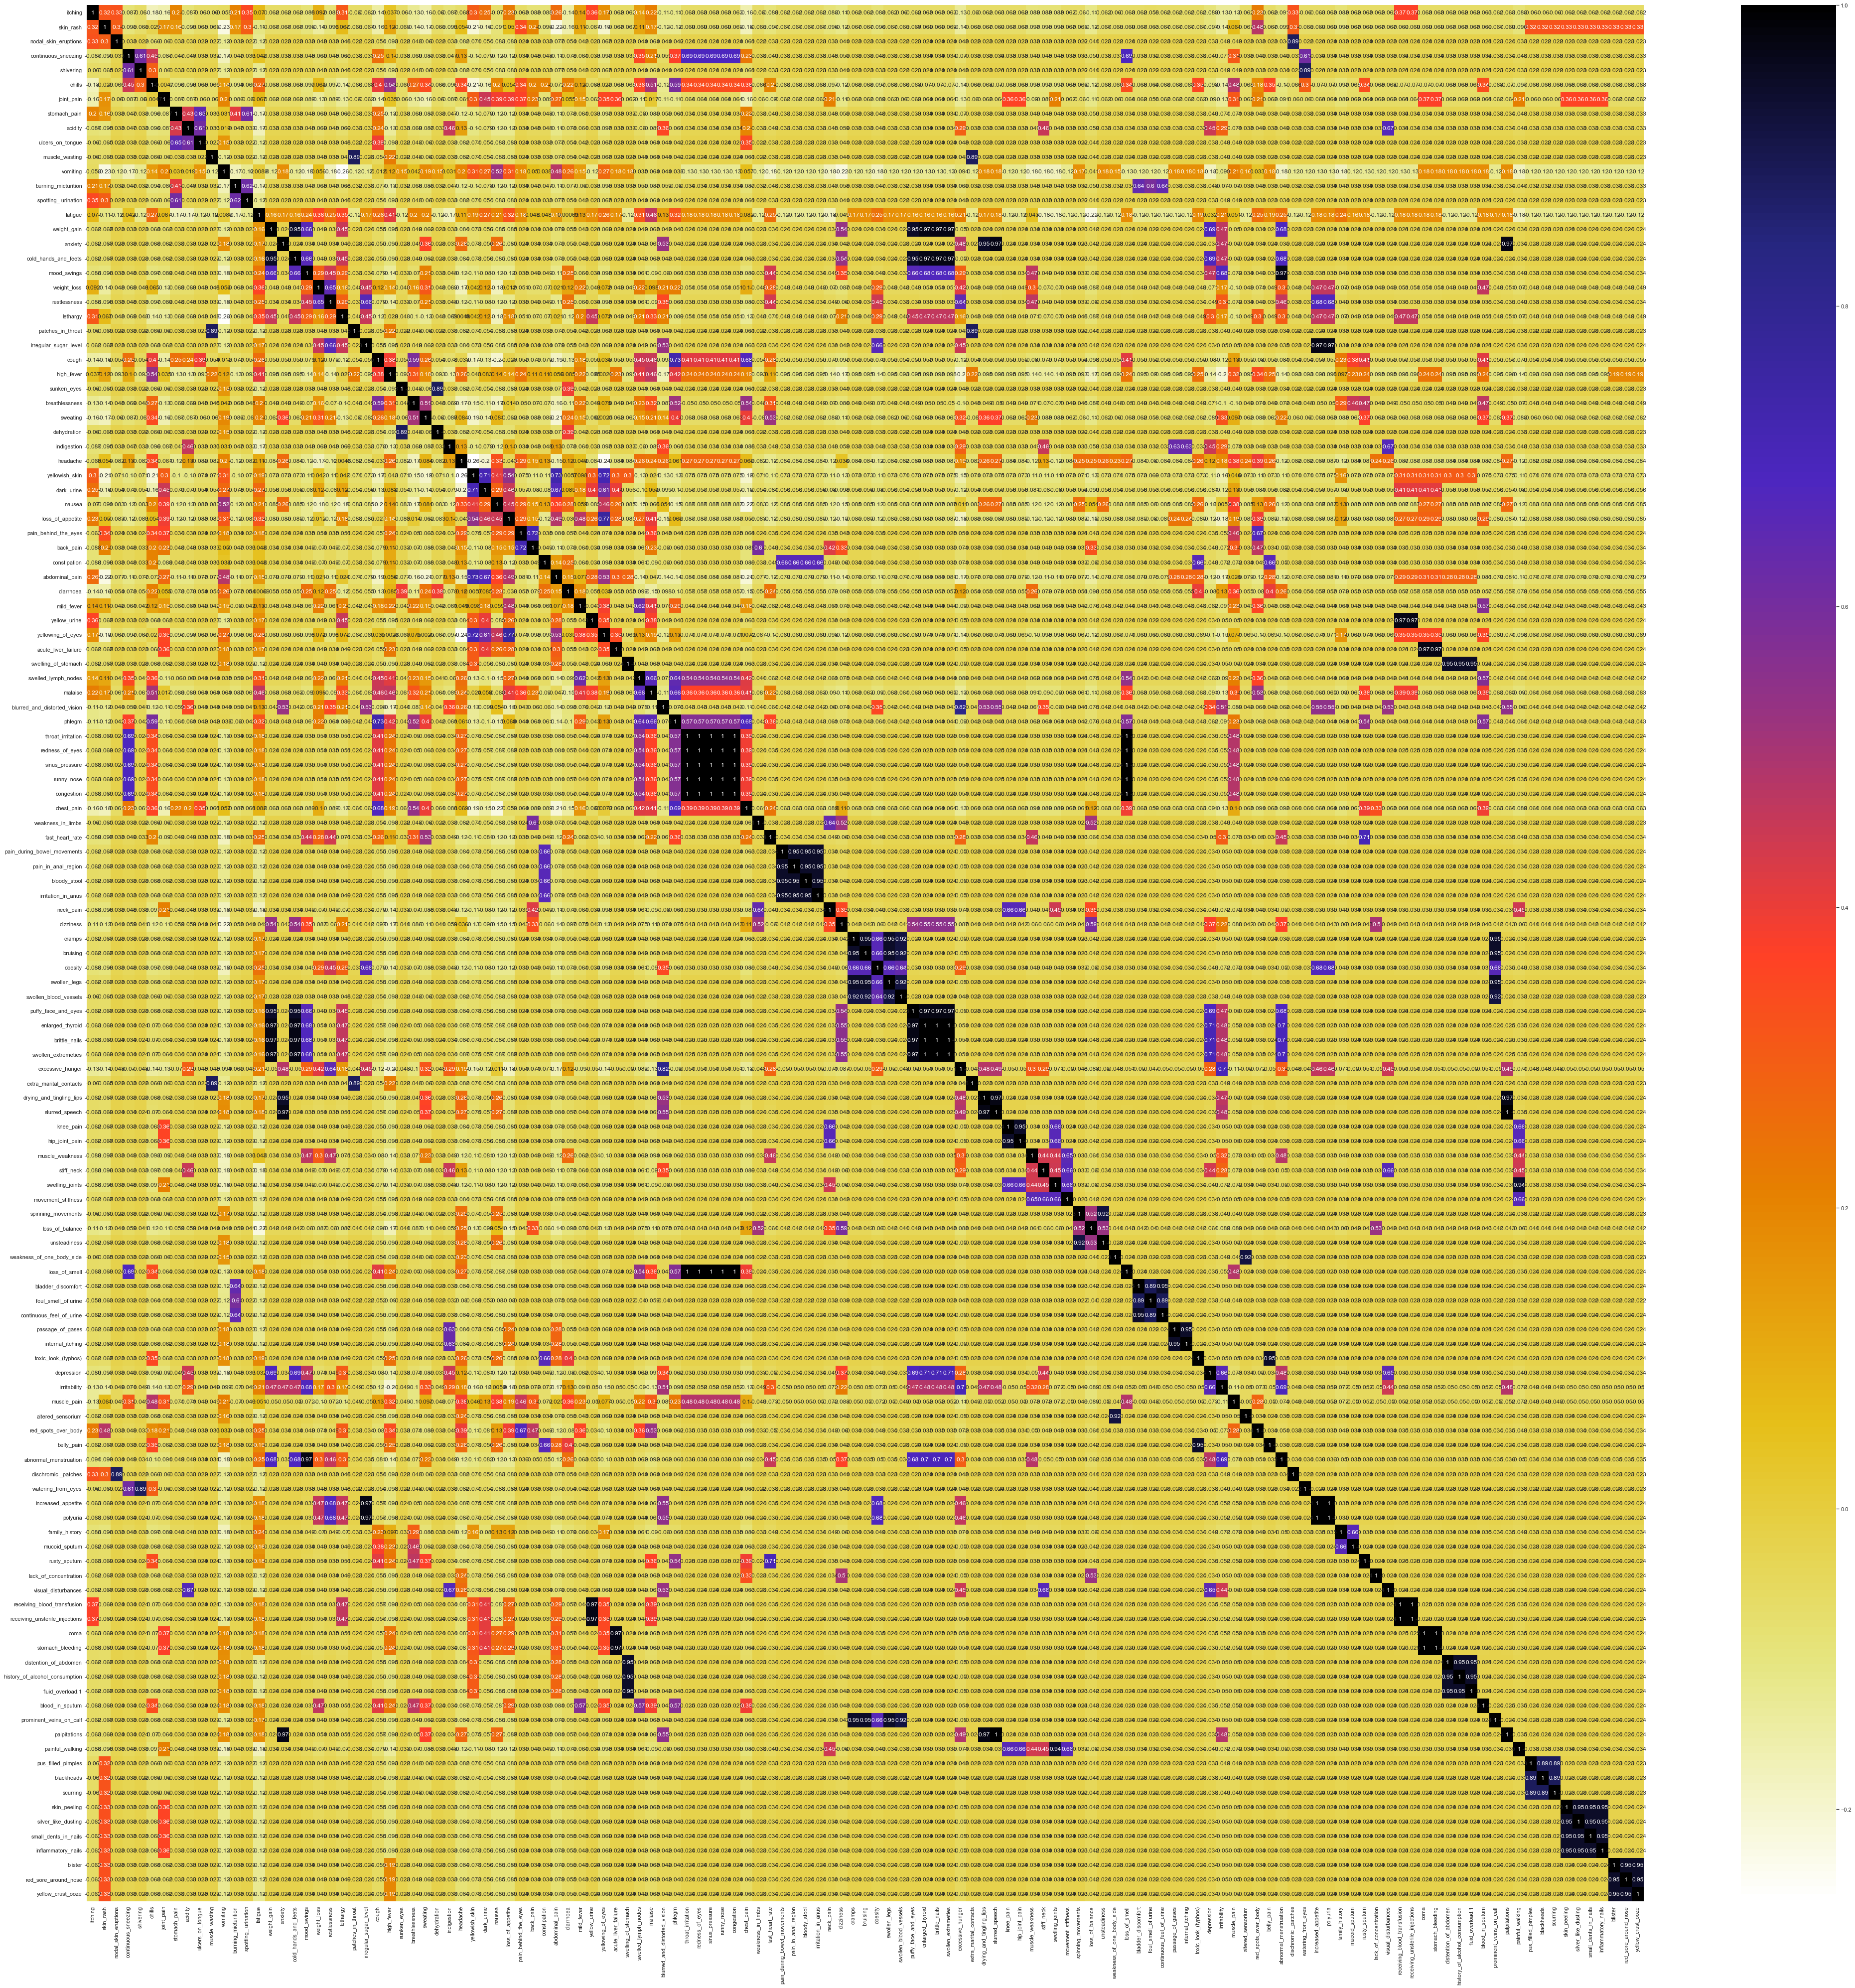

In [188]:
plt.figure(figsize = (70, 70))
sns.heatmap(cor_coeff, annot = True, cmap = plt.cm.CMRmap_r)   ## showing correlation between features using heat map
plt.show()

In [189]:
def correlation(data_matrix, threshold):     ## define function to get highly correlated features
    correlated_features = set()              ## empty set
    correlation_matrix = data_matrix.corr()  ## correlation coefficient
    for i in range(len(correlation_matrix)): ## looping throgh different values
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:   ## value greater than threshold 
                feature_name = correlation_matrix.columns[i]     ## add to set
                correlated_features.add(feature_name)
    return correlated_features

In [190]:
corr_features = correlation(X, 0.95)
print('Number of highly correlated features:', len(corr_features))
print(corr_features)

Number of highly correlated features: 17
{'runny_nose', 'swollen_extremeties', 'increased_appetite', 'redness_of_eyes', 'palpitations', 'enlarged_thyroid', 'loss_of_smell', 'receiving_unsterile_injections', 'sinus_pressure', 'polyuria', 'coma', 'congestion', 'stomach_bleeding', 'abnormal_menstruation', 'slurred_speech', 'brittle_nails', 'receiving_blood_transfusion'}


### So, there are 17 highly correlated features. We will arbitrarily keep one of them and remove other 16. 

In [191]:
corr_features.remove('sinus_pressure')
print(corr_features)


{'runny_nose', 'swollen_extremeties', 'increased_appetite', 'redness_of_eyes', 'palpitations', 'enlarged_thyroid', 'loss_of_smell', 'receiving_unsterile_injections', 'polyuria', 'coma', 'congestion', 'stomach_bleeding', 'abnormal_menstruation', 'slurred_speech', 'brittle_nails', 'receiving_blood_transfusion'}


In [192]:
X = X.drop(corr_features, axis = 1)  # dropped 16 out of 17 highly correlated features
X

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  pus_filled_pimples  blackheads  scurring  skin_peeling  \
0     ...                   0           0         0             0   
1     ...                   0           0         0             0   
2     ...                   0           0         0             0   
3     ...                   0           0         0             0   
4     ...                   0           0         0             0   
...   ...                 ...         ...       ...           ...   
4915  ...                   0           0         0             0   
4916  ...                   1           1         1             0   
4917  ...                   0           0         0             0   
4918  ...                   0           0         0             1   
4919  ...                   0           0         0             0   

      silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                       0                     0                   0        0   
1                       0                     0                   0        0   
2                       0                     0                   0        0   
3                       0                     0                   0        0   
4                       0                     0                   0        0   
...                   ...                   ...                 ...      ...   
4915                    0                     0                   0        0   
4916                    0                     0                   0        0   
4917                    0                     0                   0        0   
4918                    1                     1                   1        0   
4919                    0                     0                   0        1   

      red_sore_around_nose  yellow_crust_ooze  
0                        0                  0  
1                        0                  0  
2                        0                  0  
3                        0                  0  
4                        0                  0  
...                    ...                ...  
4915                     0                  0  
4916              

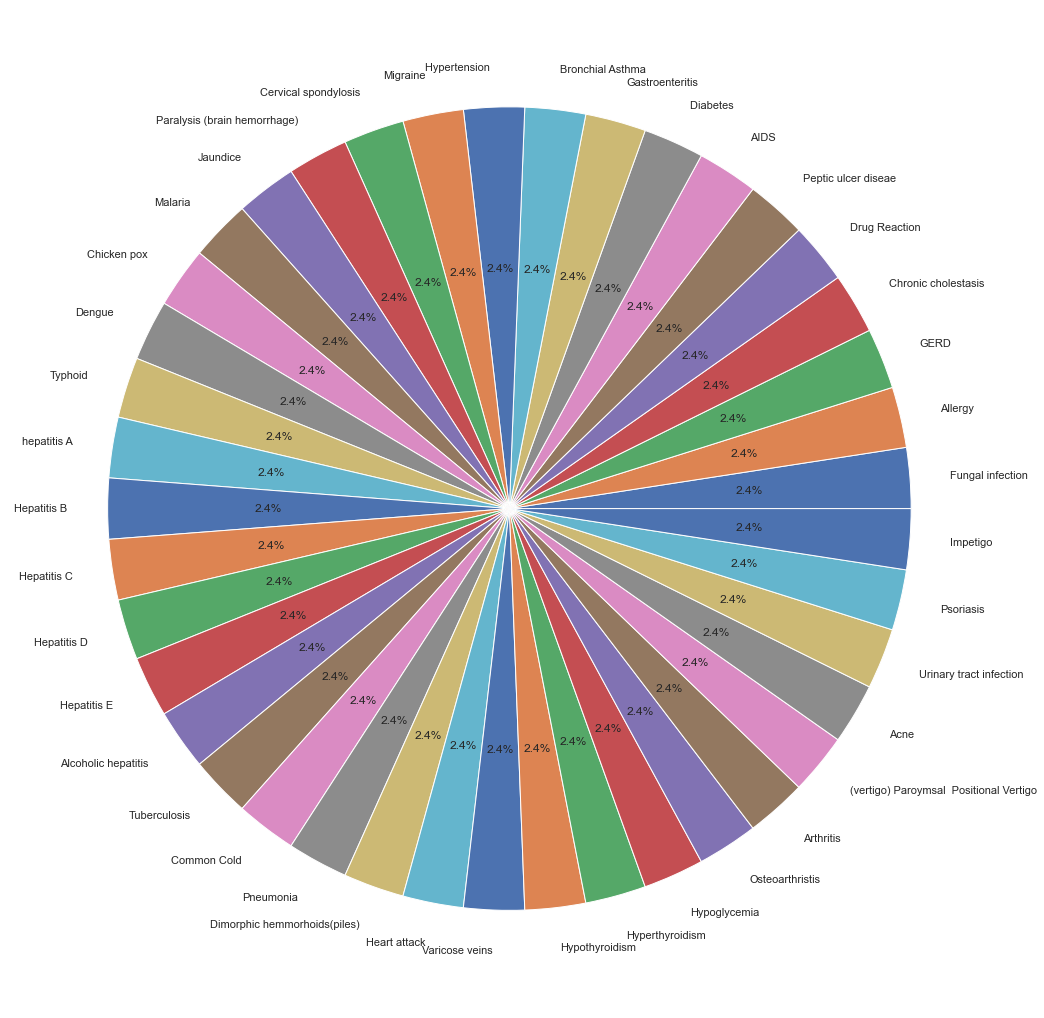

In [193]:
## Now we will check whether the data is balance or not

y_1 = df1.prognosis.value_counts()
fig = plt.figure(figsize = (18,20))
label = y.unique()
plt.pie(y_1, labels = label, autopct='%1.1f%%')
plt.show()

### So from above chart we can say the classes are balanced. Hence it's a balanced multiclass classification problem.

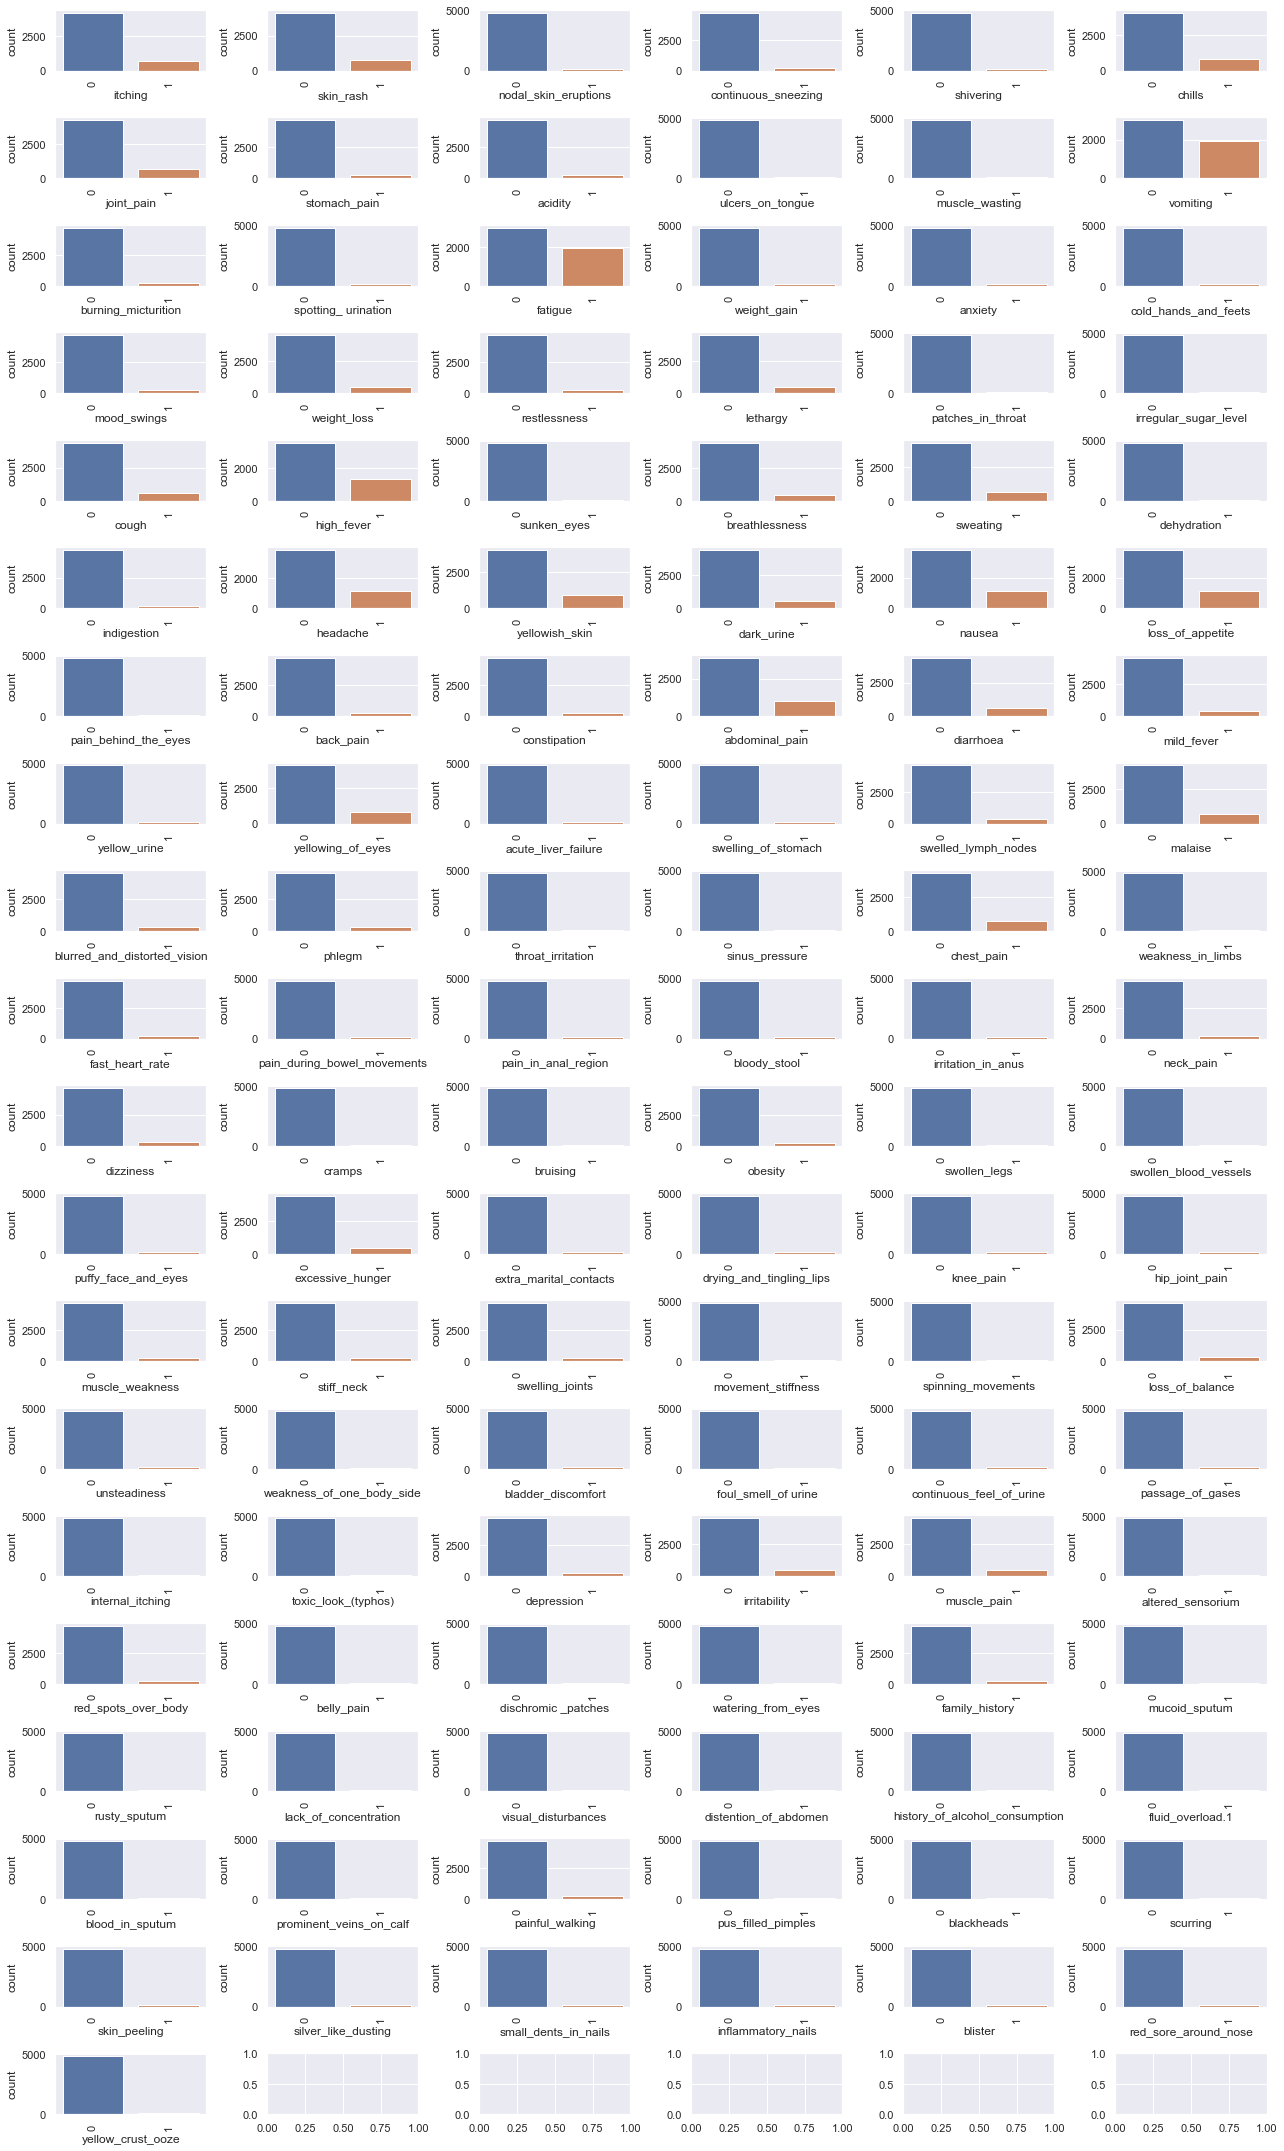

In [155]:
## Visualising disrtibution of updated data set

X_2 = X.columns
fig , axs = plt.subplots(nrows = 20, ncols = 6, figsize = (18,30))
axs = axs.flatten()

## create barplot for each categorical vaniabLe
for i, var in enumerate(X_2):
    sns.countplot(x=var, data = X, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
## adjust spacing between subplots
fig.tight_layout()
plt.show()

# Building Model

In [279]:
## import required libraries

from sklearn.svm import LinearSVC, SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance 
from scipy.stats import mode
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [195]:
## Independent and Dependent Variables
X = X     ## independent variables
y = y     ## dependent variable(multiclass classification)

In [196]:
## Encoding the target variables as 0,1,2,3....

encoder = LabelEncoder()  ## value using LabelEncoder
y = encoder.fit_transform(df1["prognosis"])
print(y)
print(X.shape)
print(y.shape)

[15 15 15 ... 38 35 27]
(4920, 115)
(4920,)


In [197]:
X

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  pus_filled_pimples  blackheads  scurring  skin_peeling  \
0     ...                   0           0         0             0   
1     ...                   0           0         0             0   
2     ...                   0           0         0             0   
3     ...                   0           0         0             0   
4     ...                   0           0         0             0   
...   ...                 ...         ...       ...           ...   
4915  ...                   0           0         0             0   
4916  ...                   1           1         1             0   
4917  ...                   0           0         0             0   
4918  ...                   0           0         0             1   
4919  ...                   0           0         0             0   

      silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                       0                     0                   0        0   
1                       0                     0                   0        0   
2                       0                     0                   0        0   
3                       0                     0                   0        0   
4                       0                     0                   0        0   
...                   ...                   ...                 ...      ...   
4915                    0                     0                   0        0   
4916                    0                     0                   0        0   
4917                    0                     0                   0        0   
4918                    1                     1                   1        0   
4919                    0                     0                   0        1   

      red_sore_around_nose  yellow_crust_ooze  
0                        0                  0  
1                        0                  0  
2                        0                  0  
3                        0                  0  
4                        0                  0  
...                    ...                ...  
4915                     0                  0  
4916              

In [198]:
#labelEncoder = LabelEncoder()
y

array([15, 15, 15, ..., 38, 35, 27])

In [199]:
## Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 81)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3936, 115)
(984, 115)
(3936,)
(984,)


## 1) SVM 

In [162]:
## Define support vector classifier with hyperparameters

lsvm = LinearSVC()
accuracies = cross_val_score(lsvm, X_train, y_train, cv=5)
lsvm.fit(X_train, y_train)
print("Train Score:", np.mean(accuracies))
print("Test Score:", lsvm.score(X_test, y_test))


Train Score: 1.0
Test Score: 1.0


### Finding Best Hyperparameter Value (Hyperparameter Tuning)

In [163]:
## Initializing GridSearchCV() object and fitting it with hyperparameters

reg = [{'C': [5, 10, 20, 40, 80, 100, 500]}] ## regularization parameter value
lsvm_clf = GridSearchCV(lsvm, reg, cv = 5, scoring = 'accuracy')  ## calling grid searchCV and pass parameter values
lsvm_clf.fit(X_train, y_train)               ## fitting the model 
 
print('Best hyperparameter value are:', lsvm_clf.best_params_)
print('Score of the model using above hyperparameter:', lsvm_clf.best_score_) 


C_opt = lsvm_clf.best_params_           ## extracting the optimum hyper parameters
lsvm_clf_model = SVC(kernel = 'linear', C = C_opt['C'], random_state = 81)  ## call the model and pass optimum hyperparameters
lsvm_clf_model.fit(X_train, y_train)    ## fitting the model with optimum hyperparameter
y_pred = lsvm_clf_model.predict(X_test) ## predicting the output
print('The classification report for model:\n', classification_report(y_test, y_pred))


Best hyperparameter value are: {'C': 5}
Score of the model using above hyperparameter: 1.0
The classification report for model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        26
      

## 2) RBF kernel SVM

In [164]:
## Building RBF kernel SVM Classifier

rbf_k_svm_model = SVC(kernel = 'rbf', C = 5, gamma = 0.1, random_state = 81) 
rbf_k_svm_model.fit(X_train, y_train)    ## fitting the model
print("Train Score:", np.mean(accuracies))
print("Test Score:", rbf_k_svm_model.score(X_test, y_test))

Train Score: 1.0
Test Score: 1.0


### Finding Best Hyperparameter Value (Hyperparameter Tuning)

In [165]:
## Building RBF kernel SVM Classifier

para_grid = {'kernel': ['rbf'], 'C': [5, 10, 25, 30, 50, 100, 250], 'gamma': [1, 0.5, 0.1, 0.005, 0.001, 0.001]}  ## different hyperparameter values
rbf_k_svm = GridSearchCV(SVC(), param_grid = para_grid, cv = 5, scoring = 'accuracy')  ## calling grid searchCV and pass parameter values
rbf_k_svm.fit(X_train, y_train)    # fitting the model 
print('Best hyperparameter values are:', rbf_k_svm.best_params_)
print('Score of the model using above hyperparameter:', rbf_k_svm.best_score_)


C_opt = rbf_k_svm.best_params_    ## extracting the optimum hyper parameters
rbf_k_svm_model = SVC(kernel = 'rbf', C = C_opt['C'], random_state = 81) ## calling the model using optimum hyperparameter
rbf_k_svm_model.fit(X_train, y_train)      ## fit the model with best parameters
y_pred = rbf_k_svm_model.predict(X_test)   ## predict the output
print('The classification report for model:\n', classification_report(y_test, y_pred))


Best hyperparameter values are: {'C': 5, 'gamma': 1, 'kernel': 'rbf'}
Score of the model using above hyperparameter: 1.0
The classification report for model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        24
          14       1.00      1

## 3) Random Forest

In [166]:
## Building Random Forest Classifier

rf = RandomForestClassifier() ## initialize RF Classifier 
rf.fit(X_train, y_train)      ## fitting the model
print("Train Score:", np.mean(accuracies))
print("Test Score:", rf.score(X_test, y_test))

Train Score: 1.0
Test Score: 1.0


### Finding Best Hyperparameter Value (Hyperparameter Tuning)

In [167]:
para_grid = {'max_depth':[2,3,4,5,6], 'max_features':[20,40,60,80,100, 115]}                ## different hyperparameter values
rf_clf = GridSearchCV(estimator = rf, param_grid = para_grid, cv = 5, scoring = 'accuracy') ## calling grid searchCV and pass parameter values
rf_clf.fit(X_train, y_train)     ## fitting the model 
print('Best hyperparameter values are:', rf_clf.best_params_)
print('Score of the model using above hyperparameter:', rf_clf.best_score_)

opt_param = rf_clf.best_params_  ## extracting the optimum hyper parameters

rf_clf_model = RandomForestClassifier(max_depth = opt_param['max_depth'], max_features = opt_param['max_features'])  ## call the model and pass best hyperparameter
rf_clf_model.fit(X_train, y_train)      ## fitting the model on optimum hyperparameter
y_pred = rf_clf_model.predict(X_test)   ## predicting the output   
print('The classification report for model using reasonable hyperparameters:\n', classification_report(y_test, y_pred))


Best hyperparameter values are: {'max_depth': 6, 'max_features': 20}
Score of the model using above hyperparameter: 0.9839982198027594
The classification report for model using reasonable hyperparameters:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       0.00      0.00      0.00        27
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        21
          12       0.90      1.00      0.95        27
          13       1.00      1.00    

## 4) Gaussian Naive Bayes

In [168]:
## Building Gaussian NB Classifier

gnb = GaussianNB()        ## initialize NB Classifier 
gnb.fit(X_train, y_train) ## fitting the model
print("Train Score:", np.mean(accuracies))
print("Test Score:", gnb.score(X_test, y_test))

Train Score: 1.0
Test Score: 1.0


### Finding Best Hyperparameter Value (Hyperparameter Tuning)

In [169]:
## Building Gaussian NB Classifier

para_grid = {'var_smoothing': np.logspace(0, -9, num = 100)}                                   ## different hyperparameter values
gnb_clf = GridSearchCV(estimator = gnb, param_grid = para_grid, cv = 5, scoring = 'accuracy', n_jobs = -1) ## calling grid searchCV and pass parameter values
gnb_clf.fit(X_train, y_train)

print('Reasonable hyperparameter value:', gnb_clf.best_params_)
print('Score of the model using above hyperparameter:', gnb_clf.best_score_)


opt_param = gnb_clf.best_params_        ## extracting the optimum hyper parameters
gnb_clf_model = GaussianNB(var_smoothing = opt_param['var_smoothing']) ## calling the model using optimum hyperparameter
gnb_clf_model.fit(X_train, y_train)     ## fitting the model on optimum parameters
y_pred = gnb_clf_model.predict(X_test)  ## predicting the output
print('The classification report for model:\n', classification_report(y_test, y_pred))


Reasonable hyperparameter value: {'var_smoothing': 1.0}
Score of the model using above hyperparameter: 1.0
The classification report for model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00 

## 5) KNN Model and Parameter Tuning

In [200]:
## Building NN Classifier

para_grid = {'alpha': [0.4, 0.2, 0.11, 0.01], 'hidden_layer_sizes': [(10,), (50,), (100,), (200,), (400,)]} ## different hyperparameter values
nn = MLPClassifier(activation = 'relu', solver = 'adam', random_state = 81)     ## define estimator
nn_clf = GridSearchCV(estimator = nn, param_grid = para_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)           ## calling grid searchCV and pass parameter values
nn_clf.fit(X_train, y_train)

print('Reasonable hyperparameter value:', nn_clf.best_params_)
print('Score of the model using above hyperparameter:', nn_clf.best_score_)


opt_param = nn_clf.best_params_        ## extracting the optimum hyper parameters
nn_clf_model = MLPClassifier(alpha = opt_param['alpha'], hidden_layer_sizes = opt_param['hidden_layer_sizes'], random_state = 81)   ## calling the model using optimum hyperparameter
nn_clf_model.fit(X_train, y_train)     ## fitting the model on optimum parameters
y_pred = nn_clf_model.predict(X_test)  ## predicting the output
print('The classification report for model:\n', classification_report(y_test, y_pred))


Reasonable hyperparameter value: {'alpha': 0.2, 'hidden_layer_sizes': (10,)}
Score of the model using above hyperparameter: 1.0
The classification report for model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        24
          14       1.00

## 6) Decision Tree classifier

In [201]:
## Fitting Decision Tree classifier
 
d_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 81)  
d_tree.fit(X_train, y_train)
y_pred= d_tree.predict(X_test)  
print("Train Score:", np.mean(accuracies))
print("Test Score:", d_tree.score(X_test, y_test))

Train Score: 1.0
Test Score: 1.0


### Finding Best Hyperparameter Value (Hyperparameter Tuning)

In [202]:
para_grid = {'criterion':['gini', 'entropy'], 'max_depth':[1,2,3,4,5,6,7]}                          ## different hyperparameter values
d_tree_clf = GridSearchCV(estimator = d_tree, param_grid = para_grid, cv = 5, scoring = 'accuracy') ## calling grid searchCV and pass parameter values
d_tree_clf.fit(X_train, y_train)     ## fitting the model 
print('Best hyperparameter values are:', d_tree_clf.best_params_)
print('Score of the model using above hyperparameter:', d_tree_clf.best_score_)

opt_param = d_tree_clf.best_params_  ## extracting the optimum hyper parameters

d_tree_clf_model = DecisionTreeClassifier(max_depth = opt_param['max_depth'], criterion = opt_param['criterion'])  ## call the model and pass best hyperparameter
d_tree_clf_model.fit(X_train, y_train)      ## fitting the model on optimum hyperparameter
y_pred = d_tree_clf_model.predict(X_test)   ## predicting the output   
print('The classification report for model using reasonable hyperparameters:\n', classification_report(y_test, y_pred))


Best hyperparameter values are: {'criterion': 'entropy', 'max_depth': 7}
Score of the model using above hyperparameter: 0.8671231109591782
The classification report for model using reasonable hyperparameters:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.89      0.94      0.92        18
           2       1.00      0.76      0.86        21
           3       0.81      0.96      0.88        26
           4       0.00      0.00      0.00        22
           5       1.00      0.90      0.95        30
           6       0.70      1.00      0.83        19
           7       0.81      0.88      0.84        24
           8       0.86      1.00      0.93        19
           9       0.88      0.81      0.85        27
          10       1.00      0.92      0.96        25
          11       1.00      1.00      1.00        21
          12       1.00      0.78      0.88        27
          13       0.00      0.00

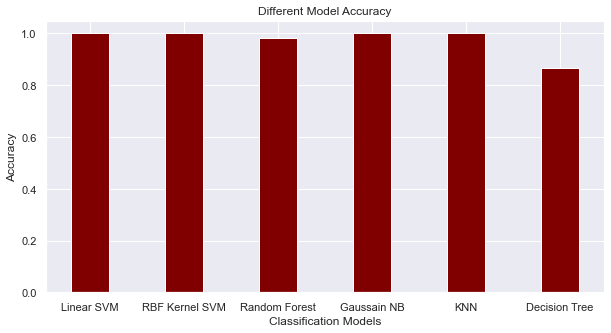

In [203]:
fig = plt.figure(figsize = (10,5))
models = ['Linear SVM', 'RBF Kernel SVM', 'Random Forest', 'Gaussain NB', 'KNN', 'Decision Tree' ]   ## models
model_acc = [lsvm_clf.best_score_, rbf_k_svm.best_score_, rf_clf.best_score_, gnb_clf.best_score_, nn_clf.best_score_, d_tree_clf.best_score_,] ## model accuracy

plt.bar(models, model_acc, color = 'maroon', width = 0.4)
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Different Model Accuracy")
plt.show()

# Feature Engineering

### Now we will find some important features of each model

Text(0.5, 1.0, 'Important Features for Linear SVM')

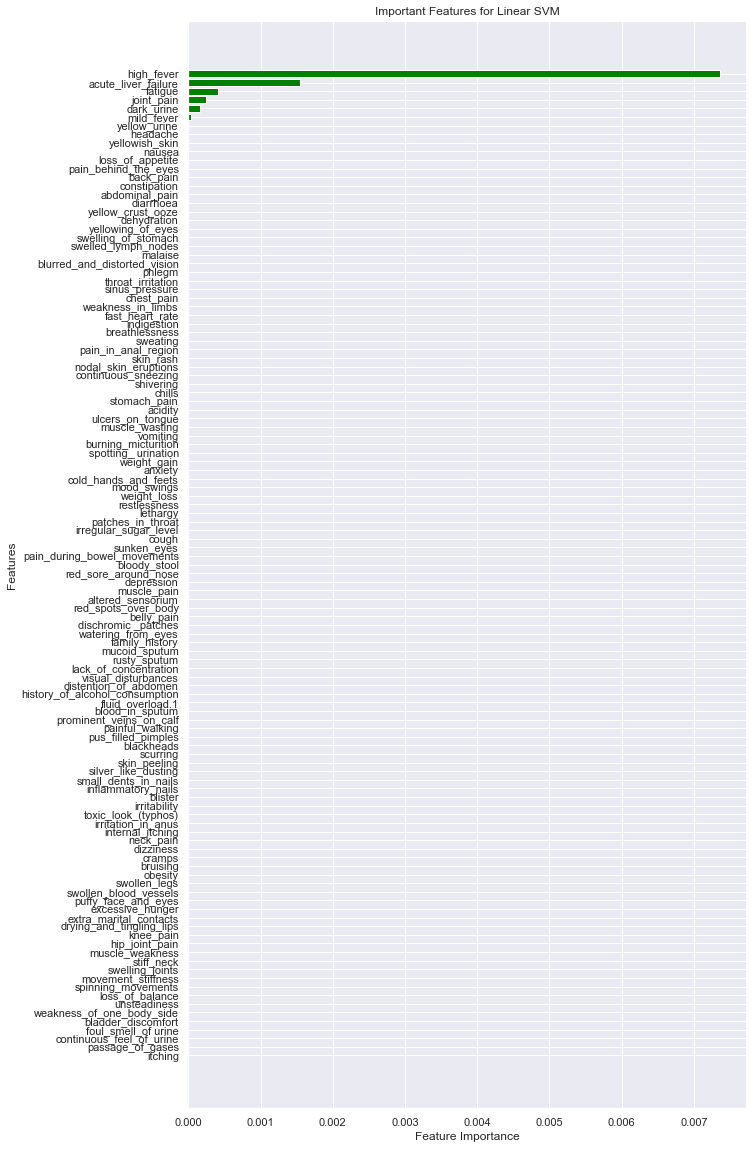

In [204]:
### linear SVM

svc =  SVC(kernel = 'linear') ## model 
svc.fit(X, y)                 ## fit the model

perm_importance = permutation_importance(svc, X, y) ## returns importance matrix
feature_names = X.columns          ## getting name of the important features
features = np.array(feature_names) ## convert the columns into array
plt.figure(figsize = (10, 20))
sorted_idx = perm_importance.importances_mean.argsort()  ## sort the feature according to their importance 
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color = 'green')  ## plot
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Important Features for Linear SVM")

Text(0.5, 1.0, 'Important Features for RBF Kernel SVM')

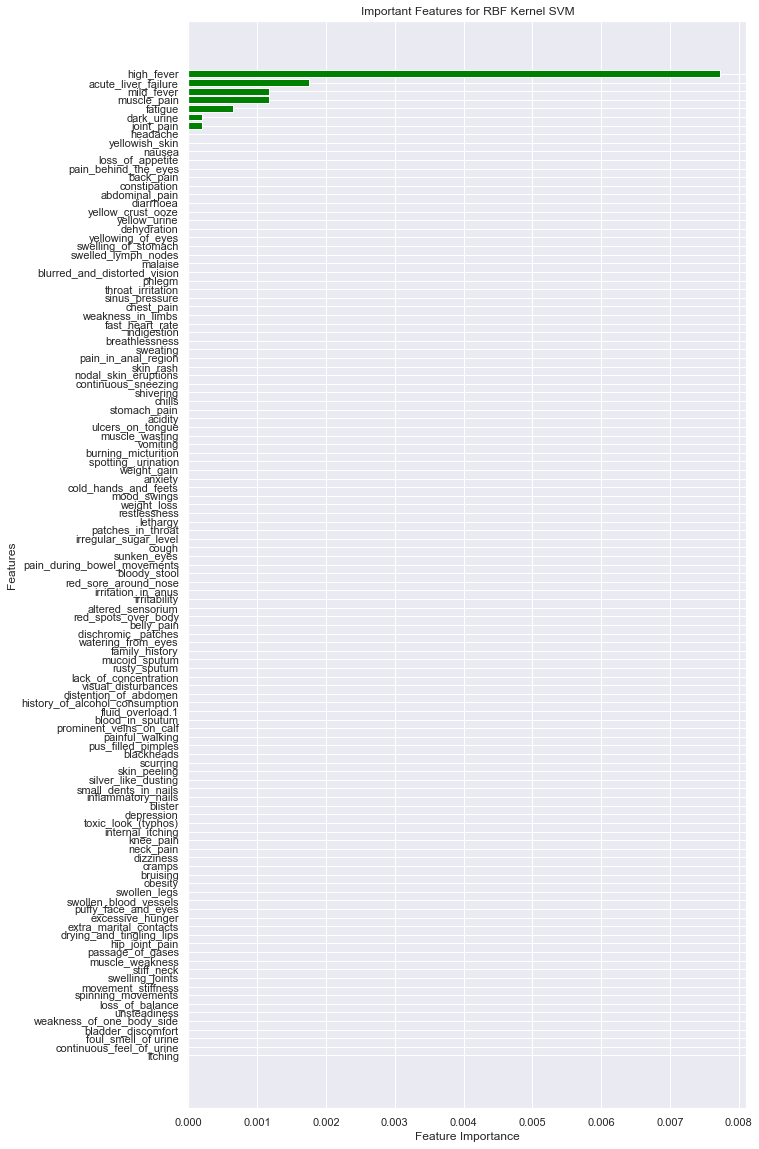

In [205]:
### RBF Kernel SVM

svc =  SVC(kernel='rbf')    ## rbf kernel model 
svc.fit(X, y)               ## fit the model

perm_importance = permutation_importance(svc, X, y) ## returns importance matrix
feature_names = X.columns          ## getting name of the important features
features = np.array(feature_names) ## convert the columns into array
plt.figure(figsize = (10, 20))
sorted_idx = perm_importance.importances_mean.argsort()  ## sort the feature according to their importance 
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color = 'green')  ## plot
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Important Features for RBF Kernel SVM")

Text(0.5, 1.0, 'Important Features for Random Forest')

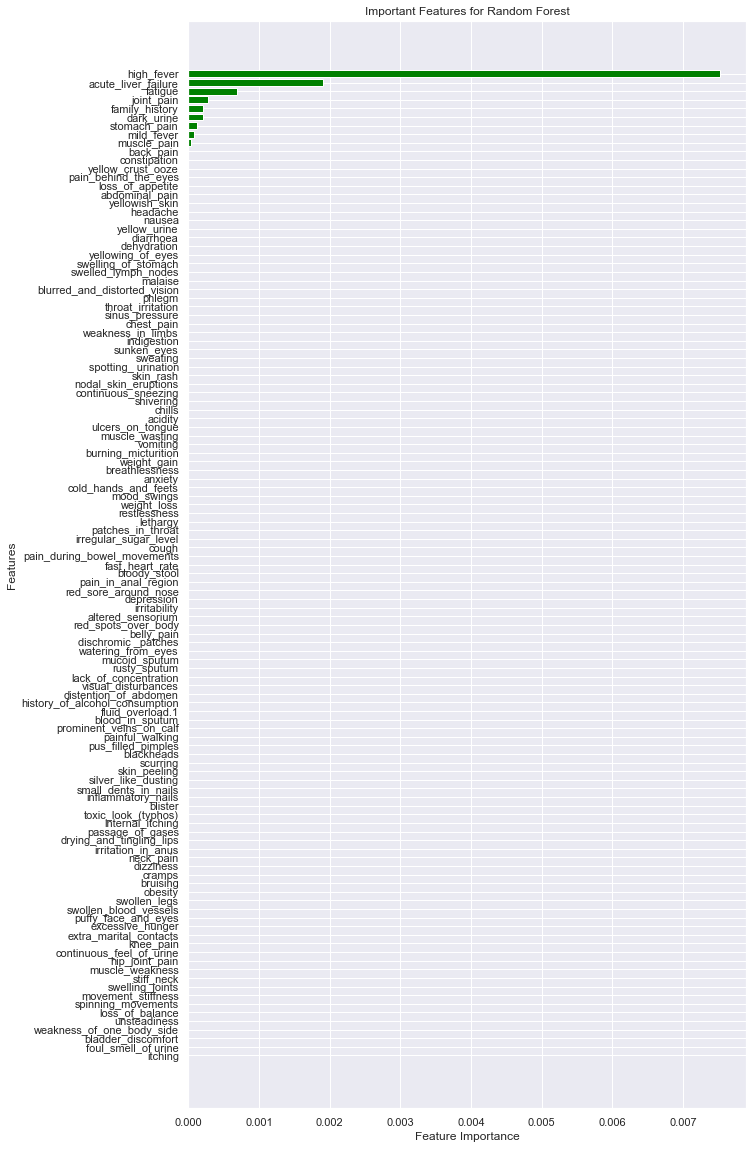

In [206]:
### Random Forest

rf = RandomForestClassifier() ## model
rf.fit(X, y)                  ## fit the model
#print(rf.feature_importances_) # feature importance matrix

perm_importance = permutation_importance(rf, X, y) ## returns importance matrix
feature_names = X.columns          ## getting name of the important features
features = np.array(feature_names) ## convert the columns into array
plt.figure(figsize = (10, 20))
sorted_idx = perm_importance.importances_mean.argsort()  ## sort the feature according to their importance 
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color = 'green')  ## plot
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Important Features for Random Forest")

Text(0.5, 1.0, 'Important Features for Gaussian Naive Bayes')

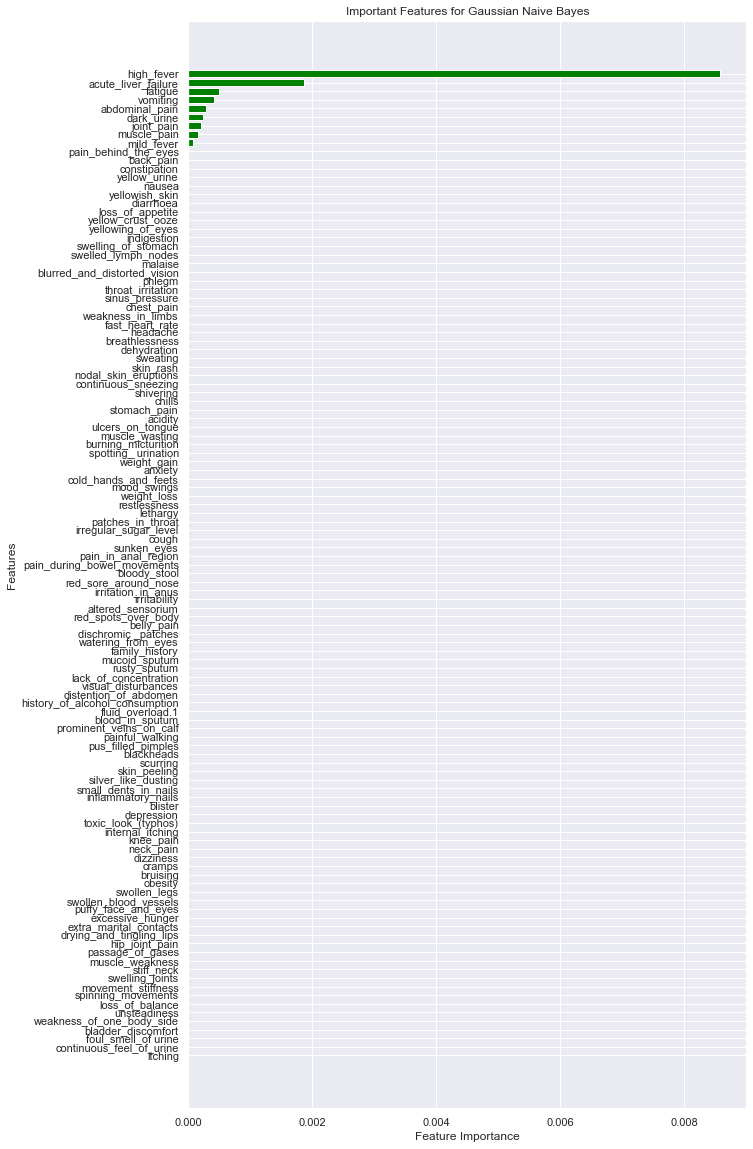

In [207]:
### Gaussian Naive Bayes

gnb = GaussianNB() ## initialize NB Classifier 
gnb.fit(X, y)      ## fitting the model

perm_importance = permutation_importance(gnb, X, y) ## returns importance matrix
feature_names = X.columns          ## getting name of the important features
features = np.array(feature_names) ## convert the columns into array
plt.figure(figsize = (10, 20))
sorted_idx = perm_importance.importances_mean.argsort()  ## sort the feature according to their importance 
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color = 'green')  ## plot
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Important Features for Gaussian Naive Bayes")

Text(0.5, 1.0, 'Important Features for KNN')

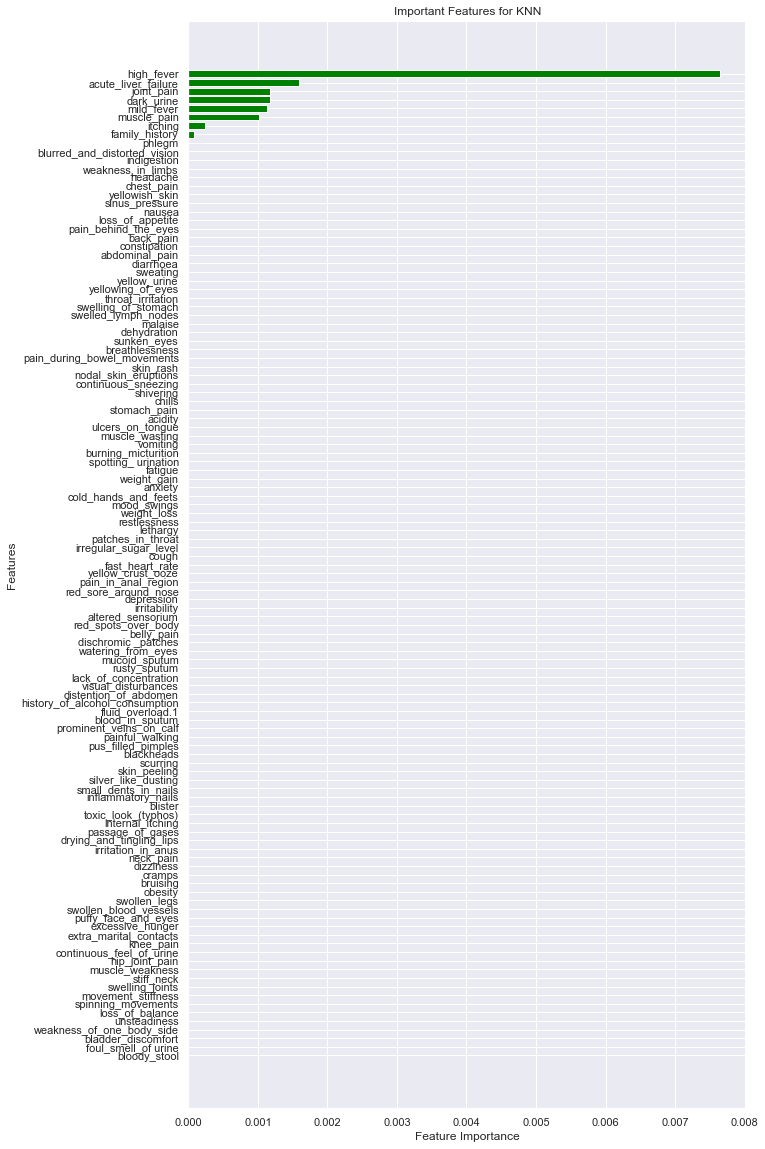

In [208]:
###  KNN

nn = MLPClassifier(activation = 'relu', solver = 'adam', random_state = 81) ## define estimator
nn.fit(X, y)    ## fit the model

perm_importance = permutation_importance(nn, X, y) ## returns importance matrix
feature_names = X.columns          ## getting name of the important features
features = np.array(feature_names) ## convert the columns into array
plt.figure(figsize = (10, 20))
sorted_idx = perm_importance.importances_mean.argsort()  ## sort the feature according to their importance 
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color = 'green')  ## plot
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Important Features for KNN")

Text(0.5, 1.0, 'Important Features for Decision Tree')

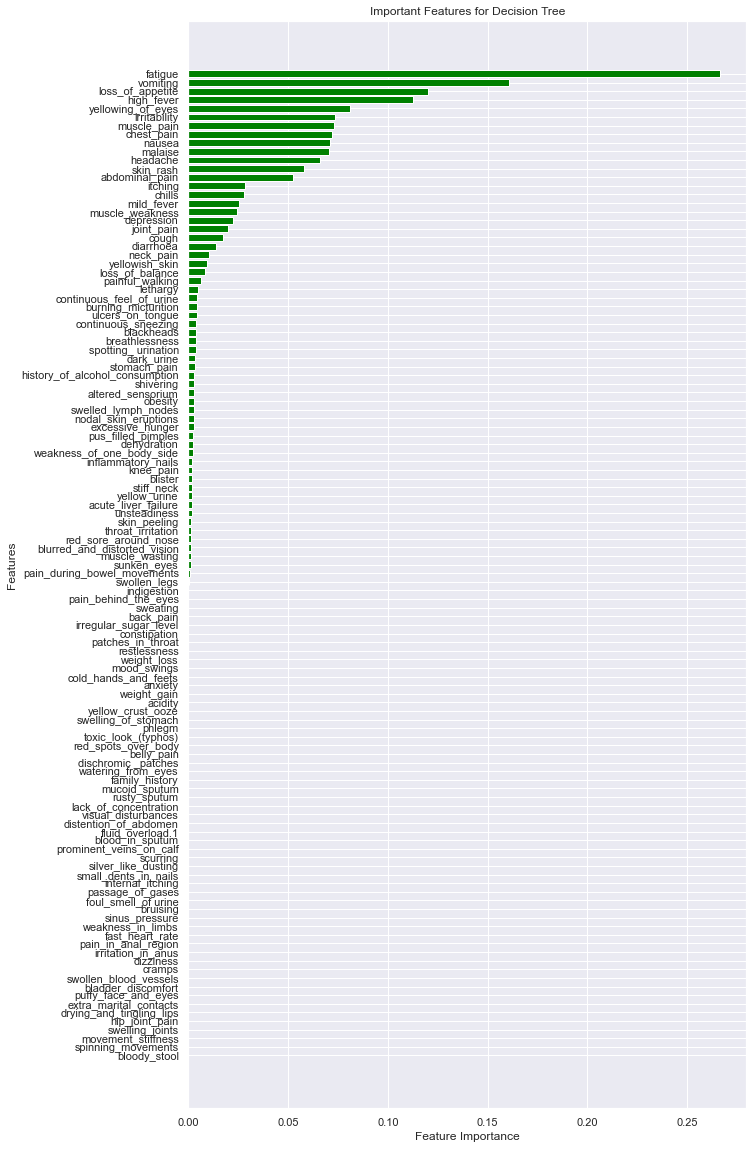

In [209]:
## Fitting Decision Tree classifier
 
d_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 81)  
d_tree.fit(X, y)

perm_importance = permutation_importance(d_tree, X, y) ## returns importance matrix
feature_names = X.columns          ## getting name of the important features
features = np.array(feature_names) ## convert the columns into array
plt.figure(figsize = (10, 20))
sorted_idx = perm_importance.importances_mean.argsort()  ## sort the feature according to their importance 
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], color = 'green')  ## plot
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Important Features for Decision Tree")

## Now we will perform RFECV to eliminate redundant features

## 1) Linear SVM

In [210]:
lsvm = SVC(kernel = 'linear') ## initialize the model
rec_fet = RFECV(estimator = lsvm, step = 1)  ## call the function and pass the required parameter value
rec_fet.fit(X, y)             ## fit the model
rec_fet.transform(X)
imp_feat = np.where(rec_fet.support_ == True)[0]      ## finds the important feature 
not_imp_feat = np.where(rec_fet.support_ == False)[0] ## finds the redundant feature
print(); print('Optimal Number of features:{}'.format(rec_fet.n_features_))
print(); print('Features which can be removed:', np.where(rec_fet.support_ == False)[0])


## print relevant and irrelevant features
relevant_features = []
for i in imp_feat:
    relevant_features.append(X.columns[i])
print('Most important features:\n', relevant_features)

irrelevant_features = []
for k in not_imp_feat:
    irrelevant_features.append(X.columns[k])
print('Redundant features:\n', irrelevant_features) 
print('\n')


Optimal Number of features:58

Features which can be removed: [  4   9  10  13  15  16  17  18  20  23  29  36  42  45  46  49  50  51
  53  54  55  57  58  61  62  64  65  66  69  70  71  75  76  78  81  82
  83  84  85  90  91  93  95  96  97  98  99 100 101 102 103 107 108 110
 111 112 114]
Most important features:
 ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'vomiting', 'burning_micturition', 'fatigue', 'weight_loss', 'lethargy', 'patches_in_throat', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'acute_liver_failure', 'malaise', 'blurred_and_distorted_vision', 'chest_pain', 'pain_in_anal_region', 'neck_pain', 'dizziness', 'obesity', 'excessive_hunger', 'extra_marital_contacts', 'muscle_weakness', 'sti

In [211]:
## testing this model using most important features and optimal hyperpameters obtained above

Xn_1 = X.drop(irrelevant_features, axis = 1)   ## this feature matrix has only important feature
Xn_1_train, Xn_1_test, y_train, y_test = train_test_split(Xn_1, y, test_size = 0.2, random_state = 81)

############### LINEAR SVM ###############

lsvm = SVC(kernel = 'linear')  ## initialize the model

## GridSearchCV() object and fitting it with  hyperparameters
reg = [{'C': [5]}]  ## optimal hyperparameters value
lsvm_clf = GridSearchCV(lsvm_1, reg, cv = 5, scoring='accuracy')
lsvm_clf.fit(Xn_1_train, y_train)

print('****Linear SVM Classifier****\n')
print('Reasonable hyperparameter value:', lsvm_clf.best_params_)
print('Score of the model using best hyperparameter:', lsvm_clf.best_score_)

C_opt = lsvm_1_clf.best_params_   ## gives optimal hyperparameters
lsvm_clf_model = SVC(kernel = 'linear', C = C_opt['C'], random_state = 81)
lsvm_clf_model.fit(Xn_1_train, y_train)
y_pred = lsvm_clf_model.predict(Xn_1_test)
print('The classification report for model:\n', classification_report(y_test, y_pred))
print('\n')


****Linear SVM Classifier****

Reasonable hyperparameter value: {'C': 5}
Score of the model using best hyperparameter: 0.9989834815756036
The classification report for model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        24
          14 

## 2) RBF Kernel SVM

In [247]:
rbf = SVC(kernel = 'rbf') ## initialize the model
rec_fet = RFECV(rbf, step = 1)  ## call the function and pass the required parameter value
rec_fet.fit(X, y)         ## fit the data
rec_fet.transform(X)      ## take tranform
imp_feat = np.where(rec_fet.support_ == True)[0]      ## finds the important feature 
not_imp_feat = np.where(rec_fet.support_ == False)[0] ## finds the redundant feature
print(); print('Optimal Number of features:{}'.format(rec_fet.n_features_))
print(); print('Features which can be removed:', np.where(rec_fet.support_ == False)[0])


## print relevant and irrelevant features
relevant_features = []
for i in imp_feat:
    relevant_features.append(X.columns[i])
print('Most important features:\n', relevant_features)

irrelevant_features = []
for k in not_imp_feat:
    irrelevant_features.append(X.columns[k])
print('Redundant features:\n', irrelevant_features) 
print('\n')


Optimal Number of features:58

Features which can be removed: [  4   9  10  13  15  16  17  18  20  23  29  36  42  45  46  49  50  51
  53  54  55  57  58  61  62  64  65  66  69  70  71  75  76  78  81  82
  83  84  85  90  91  93  95  96  97  98  99 100 101 102 103 107 108 110
 111 112 114]
Most important features:
 ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'vomiting', 'burning_micturition', 'fatigue', 'weight_loss', 'lethargy', 'patches_in_throat', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'acute_liver_failure', 'malaise', 'blurred_and_distorted_vision', 'chest_pain', 'pain_in_anal_region', 'neck_pain', 'dizziness', 'obesity', 'excessive_hunger', 'extra_marital_contacts', 'muscle_weakness', 'sti

In [249]:
## testing this model using most important features and optimal hyperpameters obtained above

Xn_1 = X.drop(irrelevant_features, axis = 1)   ## this feature matrix has only important feature
Xn_1_train, Xn_1_test, y_train, y_test = train_test_split(Xn_1, y, test_size = 0.2, random_state = 81)

############### RBF Kernel SVM ###############

para_grid = {'kernel': ['rbf'], 'C': [5, 10, 25, 30, 50, 100, 250], 'gamma': [1, 0.5, 0.1, 0.005, 0.001, 0.001]}  ## different hyperparameter values
rbf_k_svm = GridSearchCV(SVC(), param_grid = para_grid, cv = 5, scoring = 'accuracy')  ## calling grid searchCV and pass parameter values
rbf_k_svm.fit(Xn_1_train, y_train)    ## fitting the model 

print('****RBF Kernel SVM Classifier****\n')
print('Best hyperparameter values are:', rbf_k_svm.best_params_)
print('Score of the model using best hyperparameter:', rbf_k_svm.best_score_)


C_opt = rbf_k_svm.best_params_   ## gives optimal hyperparameters
rbf_k_svm_model = SVC(kernel = 'rbf', C = C_opt['C'], random_state = 81)
rbf_k_svm_model.fit(Xn_1_train, y_train)
y_pred = rbf_k_svm_model.predict(Xn_1_test)
print('The classification report for model:\n', classification_report(y_test, y_pred))
print('\n')


****RBF Kernel SVM Classifier****

Best hyperparameter values are: {'C': 5, 'gamma': 1, 'kernel': 'rbf'}
Score of the model using best hyperparameter: 1.0
The classification report for model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00       

## 3) Random Forest

In [250]:
rf = RandomForestClassifier() ## initialize RF Classifier 
rec_fet = RFECV(estimator = rf, step = 1)  ## call the function and pass the required parameter value
rec_fet.fit(X, y)         ## fit the data
rec_fet.transform(X)      ## transform data
imp_feat = np.where(rec_fet.support_ == True)[0]      ## finds the important feature 
not_imp_feat = np.where(rec_fet.support_ == False)[0] ## finds the redundant feature
print(); print('Optimal Number of features:{}'.format(rec_fet.n_features_))
print(); print('Features which can be removed:', np.where(rec_fet.support_ == False)[0])


## print relevant and irrelevant features
relevant_features = []
for i in imp_feat:
    relevant_features.append(X.columns[i])
print('Most important features:\n', relevant_features)

irrelevant_features = []
for k in not_imp_feat:
    irrelevant_features.append(X.columns[k])
print('Redundant features:\n', irrelevant_features) 
print('\n')


Optimal Number of features:66

Features which can be removed: [  1   3   4   9  10  12  15  16  17  18  20  23  26  30  32  36  38  42
  45  46  48  50  51  53  55  56  61  63  65  66  68  69  71  74  76  79
  81  85  96  98  99 100 102 103 104 105 108 111 112]
Most important features:
 ['itching', 'nodal_skin_eruptions', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'vomiting', 'spotting_ urination', 'fatigue', 'weight_loss', 'lethargy', 'patches_in_throat', 'cough', 'high_fever', 'breathlessness', 'sweating', 'dehydration', 'headache', 'dark_urine', 'nausea', 'loss_of_appetite', 'back_pain', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'acute_liver_failure', 'malaise', 'phlegm', 'chest_pain', 'fast_heart_rate', 'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'bruising', 'swollen_legs', 'excessive_hunger', 'knee_pain', 'muscle_weakness', 'stiff_neck', 'movement_stiffness', 'loss_of_balance', 'unsteadiness', 'bladder_discomfort', 'continuous_f

In [251]:
## testing this model using most important features and optimal hyperpameters obtained above

Xn_1 = X.drop(irrelevant_features, axis = 1)   ## this feature matrix has only important feature
Xn_1_train, Xn_1_test, y_train, y_test = train_test_split(Xn_1, y, test_size = 0.2, random_state = 81)

############### Random Forest ###############

para_grid = {'max_depth':[2,3,4,5,6], 'max_features':[20,40,60,80,100, 115]}                ## different hyperparameter values
rf_clf = GridSearchCV(estimator = rf, param_grid = para_grid, cv = 5, scoring = 'accuracy') ## calling grid searchCV and pass parameter values
rf_clf.fit(Xn_1_train, y_train)     ## fitting the model 

print('***Random Forest Classifier***\n')
print('Best hyperparameter values are:', rf_clf.best_params_)
print('Score of the model using above hyperparameter:', rf_clf.best_score_)

opt_param = rf_clf.best_params_  ## extracting the optimum hyper parameters

rf_1_clf_model = RandomForestClassifier(max_depth = opt_param['max_depth'], max_features = opt_param['max_features'])  ## call the model and pass best hyperparameter
rf_1_clf_model.fit(Xn_1_train, y_train)      ## fitting the model on optimum hyperparameter
y_pred = rf_1_clf_model.predict(Xn_1_test)   ## predicting the output   
print('The classification report for model using reasonable hyperparameters:\n', classification_report(y_test, y_pred))



***Random Forest Classifier***

Best hyperparameter values are: {'max_depth': 5, 'max_features': 20}
Score of the model using above hyperparameter: 0.9791649197943743
The classification report for model using reasonable hyperparameters:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.78      0.88        18
           2       1.00      1.00      1.00        21
           3       1.00      0.92      0.96        26
           4       1.00      0.73      0.84        22
           5       1.00      1.00      1.00        30
           6       0.86      1.00      0.93        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       0.93      0.93      0.93        27
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        27
     

## 4) Gaussian Naive Bayes

In [252]:
gnb = GaussianNB()
rec_fet = RFECV(estimator = gnb, step = 1)  ## call the function and pass the required parameter value
rec_fet.fit(X, y)         ## fit the data
rec_fet.transform(X)      ## transform data
imp_feat = np.where(rec_fet.support_ == True)[0]      ## finds the important feature 
not_imp_feat = np.where(rec_fet.support_ == False)[0] ## finds the redundant feature
print(); print('Optimal Number of features:{}'.format(rec_fet.n_features_))
print(); print('Features which can be removed:', np.where(rec_fet.support_ == False)[0])


## print relevant and irrelevant features
relevant_features = []
for i in imp_feat:
    relevant_features.append(X.columns[i])
print('Most important features:\n', relevant_features)

irrelevant_features = []
for k in not_imp_feat:
    irrelevant_features.append(X.columns[k])
print('Redundant features:\n', irrelevant_features) 
print('\n')


Optimal Number of features:64

Features which can be removed: [  2   4   9  12  15  16  17  18  20  22  29  30  36  42  45  46  48  50
  51  53  55  57  58  62  63  65  66  68  69  71  74  75  76  79  81  84
  85  91  93  95  98  99 101 102 103 104 107 108 110 111 114]
Most important features:
 ['itching', 'skin_rash', 'continuous_sneezing', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'muscle_wasting', 'vomiting', 'spotting_ urination', 'fatigue', 'weight_loss', 'lethargy', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'acute_liver_failure', 'malaise', 'phlegm', 'chest_pain', 'fast_heart_rate', 'pain_in_anal_region', 'neck_pain', 'dizziness', 'cramps', 'swollen_legs', 'excessive_hunger', 'knee_pain', 'muscle_weakness', 'stiff_neck', 'loss_of_balance', 'unsteadiness'

In [253]:
## testing this model using most important features and optimal hyperpameters obtained above

Xn_1 = X.drop(irrelevant_features, axis = 1)   ## this feature matrix has only important feature
Xn_1_train, Xn_1_test, y_train, y_test = train_test_split(Xn_1, y, test_size = 0.2, random_state = 81)

############### Gaussian NB ###############


para_grid = {'var_smoothing': np.logspace(0, -9, num = 100)}                                   ## different hyperparameter values
gnb_clf = GridSearchCV(gnb, param_grid = para_grid, cv = 5, scoring = 'accuracy', n_jobs = -1) ## calling grid searchCV and pass parameter values
gnb_clf.fit(Xn_1_train, y_train)

print('***Gaussian NB Classifier***\n')
print('Reasonable hyperparameter value:', gnb_clf.best_params_)
print('Score of the model using above hyperparameter:', gnb_clf.best_score_)


opt_param = gnb_clf.best_params_        ## extracting the optimum hyper parameters
gnb_clf_model = GaussianNB(var_smoothing = opt_param['var_smoothing']) ## calling the model using optimum hyperparameter
gnb_clf_model.fit(Xn_1_train, y_train)     ## fitting the model on optimum parameters
y_pred = gnb_clf_model.predict(Xn_1_test)  ## predicting the output
print('The classification report for model:\n', classification_report(y_test, y_pred))


***Gaussian NB Classifier***

Reasonable hyperparameter value: {'var_smoothing': 1.0}
Score of the model using above hyperparameter: 1.0
The classification report for model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        24
          14  

## 5) KNN Model

In [254]:
nn = MLPClassifier(activation = 'relu', solver = 'adam', random_state = 81)
rec_fet = RFECV(estimator = rf, step = 1)  ## call the function and pass the required parameter value
rec_fet.fit(X, y)         ## fit the data
rec_fet.transform(X)      ## transform data
imp_feat = np.where(rec_fet.support_ == True)[0]      ## finds the important feature 
not_imp_feat = np.where(rec_fet.support_ == False)[0] ## finds the redundant feature
print(); print('Optimal Number of features:{}'.format(rec_fet.n_features_))
print(); print('Features which can be removed:', np.where(rec_fet.support_ == False)[0])

## print relevant and irrelevant features
relevant_features = []
for i in imp_feat:
    relevant_features.append(X.columns[i])
print('Most important features:\n', relevant_features)

irrelevant_features = []
for k in not_imp_feat:
    irrelevant_features.append(X.columns[k])
print('Redundant features:\n', irrelevant_features) 
print('\n')


Optimal Number of features:59

Features which can be removed: [  4   9  12  13  15  16  17  18  20  22  23  26  29  30  36  38  42  45
  46  48  50  51  53  55  56  61  62  63  65  66  68  69  70  74  75  76
  79  81  84  90  91  93  95  96  98  99 100 102 103 104 106 107 109 110
 111 113]
Most important features:
 ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'muscle_wasting', 'vomiting', 'fatigue', 'weight_loss', 'lethargy', 'cough', 'high_fever', 'breathlessness', 'sweating', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'back_pain', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes', 'acute_liver_failure', 'malaise', 'phlegm', 'chest_pain', 'fast_heart_rate', 'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'swollen_legs', 'excessive_hunger', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'loss_of_balance', 'unsteadiness', 'bladder_discomfort', 

In [255]:
## testing this model using most important features and optimal hyperpameters obtained above

Xn_1 = X.drop(irrelevant_features, axis = 1)   ## this feature matrix has only important feature
Xn_1_train, Xn_1_test, y_train, y_test = train_test_split(Xn_1, y, test_size = 0.2, random_state = 81)

############### KNN ###############

para_grid = {'alpha': [0.4, 0.2, 0.11, 0.01], 'hidden_layer_sizes': [(10,), (50,), (100,), (200,), (400,)]} ## different hyperparameter values
nn = MLPClassifier(activation = 'relu', solver = 'adam', random_state = 81)     ## define estimator
nn_clf = GridSearchCV(nn, param_grid = para_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)              ## calling grid searchCV and pass parameter values
nn_clf.fit(Xn_1_train, y_train)

print('Reasonable hyperparameter value:', nn_clf.best_params_)
print('Score of the model using above hyperparameter:', nn_clf.best_score_)


opt_param = nn_clf.best_params_        ## extracting the optimum hyper parameters
nn_clf_model = MLPClassifier(alpha = opt_param['alpha'], hidden_layer_sizes = opt_param['hidden_layer_sizes'], random_state = 81)   ## calling the model using optimum hyperparameter
nn_clf_model.fit(Xn_1_train, y_train)     ## fitting the model on optimum parameters
y_pred = nn_clf_model.predict(Xn_1_test)  ## predicting the output
print('The classification report for model:\n', classification_report(y_test, y_pred))


Reasonable hyperparameter value: {'alpha': 0.2, 'hidden_layer_sizes': (10,)}
Score of the model using above hyperparameter: 1.0
The classification report for model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        24
          14       1.00

## 6) Decision Tree

In [256]:
d_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 81)
rec_fet = RFECV(estimator = d_tree, step = 1)  ## call the function and pass the required parameter value
rec_fet.fit(X, y)         ## fit the data
rec_fet.transform(X)      ## transform data
imp_feat = np.where(rec_fet.support_ == True)[0]      ## finds the important feature 
not_imp_feat = np.where(rec_fet.support_ == False)[0] ## finds the redundant feature
print(); print('Optimal Number of features:{}'.format(rec_fet.n_features_))
print(); print('Features which can be removed:', np.where(rec_fet.support_ == False)[0])


## print relevant and irrelevant features
relevant_features = []
for i in imp_feat:
    relevant_features.append(X.columns[i])
print('Most important features:\n', relevant_features)

irrelevant_features = []
for k in not_imp_feat:
    irrelevant_features.append(X.columns[k])
print('Redundant features:\n', irrelevant_features) 
print('\n')


Optimal Number of features:47

Features which can be removed: [  2   9  10  15  16  17  18  20  22  23  26  27  28  30  33  36  37  41
  42  46  48  49  50  51  53  54  55  56  57  58  62  63  64  65  66  69
  70  71  73  75  76  79  81  82  83  84  85  86  90  91  93  94  95  96
  97  98  99 100 101 102 103 104 105 108 109 110 113 114]
Most important features:
 ['itching', 'skin_rash', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_loss', 'lethargy', 'cough', 'high_fever', 'dehydration', 'headache', 'yellowish_skin', 'nausea', 'loss_of_appetite', 'constipation', 'abdominal_pain', 'diarrhoea', 'yellowing_of_eyes', 'acute_liver_failure', 'swelling_of_stomach', 'malaise', 'chest_pain', 'neck_pain', 'dizziness', 'cramps', 'excessive_hunger', 'extra_marital_contacts', 'muscle_weakness', 'swelling_joints', 'loss_of_balance', 'unsteadiness', 'bladder_discomfort', 'irritabilit

In [257]:
## testing this model using most important features and optimal hyperpameters obtained above

Xn_1 = X.drop(irrelevant_features, axis = 1)   ## this feature matrix has only important feature
Xn_1_train, Xn_1_test, y_train, y_test = train_test_split(Xn_1, y, test_size = 0.2, random_state = 81)

############### Decision Tree ###############

para_grid = {'criterion':['gini', 'entropy'], 'max_depth':[1,2,3,4,5,6,7]}                          ## different hyperparameter values
d_tree_clf = GridSearchCV(estimator = d_tree, param_grid = para_grid, cv = 5, scoring = 'accuracy') ## calling grid searchCV and pass parameter values
d_tree_clf.fit(Xn_1_train, y_train)     ## fitting the model 
print('Best hyperparameter values are:', d_tree_clf.best_params_)
print('Score of the model using above hyperparameter:', d_tree_clf.best_score_)

opt_param = d_tree_clf.best_params_  ## extracting the optimum hyper parameters

d_tree_clf_model = DecisionTreeClassifier(max_depth = opt_param['max_depth'], criterion = opt_param['criterion'])  ## call the model and pass best hyperparameter
d_tree_clf_model.fit(Xn_train, y_train)      ## fitting the model on optimum hyperparameter
y_pred = d_tree_clf_model.predict(Xn_test)   ## predicting the output   
print('The classification report for model using reasonable hyperparameters:\n', classification_report(y_test, y_pred))


Best hyperparameter values are: {'criterion': 'entropy', 'max_depth': 7}
Score of the model using above hyperparameter: 0.8732212540070563
The classification report for model using reasonable hyperparameters:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.89      0.94      0.92        18
           2       1.00      0.76      0.86        21
           3       0.81      0.96      0.88        26
           4       0.00      0.00      0.00        22
           5       1.00      0.83      0.91        30
           6       0.70      1.00      0.83        19
           7       0.81      0.88      0.84        24
           8       0.86      1.00      0.93        19
           9       1.00      0.81      0.90        27
          10       1.00      0.92      0.96        25
          11       1.00      1.00      1.00        21
          12       1.00      0.78      0.88        27
          13       0.00      0.00

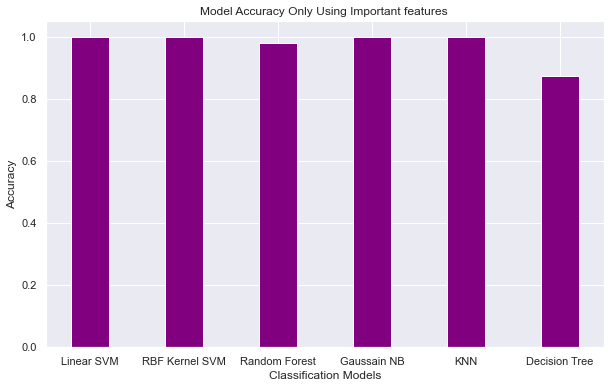

In [258]:
fig = plt.figure(figsize = (10,6))
models = ['Linear SVM', 'RBF Kernel SVM', 'Random Forest', 'Gaussain NB', 'KNN', 'Decision Tree' ]   ## models
model_acc = [lsvm_clf.best_score_, rbf_k_svm.best_score_, rf_clf.best_score_, gnb_clf.best_score_, nn_clf.best_score_, d_tree_clf.best_score_,] ## model accuracy

plt.bar(models, model_acc, color = 'purple', width = 0.4)
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Only Using Important features ")
plt.show()

# Now we will combine best model and check the accuracy on test data
### Linerar SVM, RBF Kernel SVM, Random Forest, Gaussain NB, KNN combining these models

In [259]:
os.getcwd()

'D:\\EE1Sem2 Course\\EE769 IML\\Project\\DataSet'

In [287]:
df1 = pd.read_csv('Testing.csv')           ## reading data  
#df1 = df1.drop(['Unnamed: 133'], axis = 1) ## drop the irrelevant column
X_test = df1.drop(['prognosis'], axis = 1) ## feature matrix
y_test = df1['prognosis']                  ## target variable
encoder = LabelEncoder()              ## value using LabelEncoder
y_test = encoder.fit_transform(df1["prognosis"])

Accuracy of the combined model on  Test dataset: 100.0


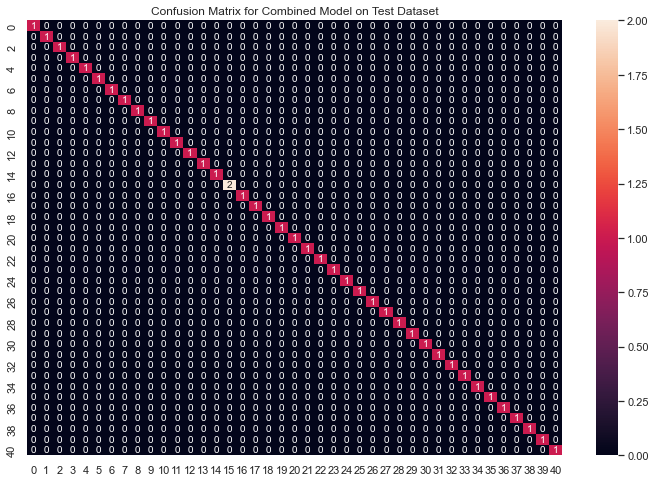

In [288]:
## Training the best 5 models on whole data
fin_lsvm_clf_model = SVC(kernel = 'linear', C = 5, random_state = 81)
fin_rbf_k_svm_model = SVC(kernel = 'rbf', C = 5, random_state = 81)
fin_rf_clf_model = RandomForestClassifier(max_depth = 5,  max_features = 20)
fin_gnb_clf_model = GaussianNB()
fin_nn_clf_model = MLPClassifier(random_state = 81)
 
## fit the model
fin_lsvm_clf_model.fit(X, y)
fin_rbf_k_svm_model.fit(X, y)
fin_rf_clf_model.fit(X, y)
fin_gnb_clf_model.fit(X, y)
fin_nn_clf_model.fit(X, y)
    
## Making prediction by take mode of predictions

y_lsvm_pred = fin_lsvm_clf_model.predict(X_test)
y_rbf_k_pred = fin_rbf_k_svm_model.predict(X_test)
y_rf_pred = fin_rf_clf_model.predict(X_test)
y_gnb_pred = fin_gnb_clf_model.predict(X_test)
y_nn_pred = fin_nn_clf_model.predict(X_test)


final_preds = [mode([i,j,k])[0][0] for i,j,k,l,m in zip(y_lsvm_pred, y_rbf_k_pred, y_rf_pred, y_gnb_pred, y_nn_pred)]
 
print(f"Accuracy of the combined model on  Test dataset\
: {accuracy_score(y_test, final_preds)*100}")
 
cf_matrix = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

## Prediction of the Model by taking input from the user

In [295]:
symptoms = X.columns.values   ## symptoms of the desease

symptom_index = {}   ## creating dictionary to encode input symptoms into numerical form
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
    data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_}
    
    
def predictDisease(symptoms):       ## Defining the Function, it takes the input as symptoms name
    symptoms = symptoms.split(",") 
    input_data = [0] * len(data_dict["symptom_index"])  ## creating input data for the models
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
    
    input_data = np.array(input_data).reshape(1,-1)  ## convert the data into array suitable for the prediction
    
    
    ## generating output from individual models
    lsvm_prediction = data_dict["predictions_classes"][fin_lsvm_clf_model.predict(input_data)[0]]
    rbf_k_prediction = data_dict["predictions_classes"][fin_rbf_k_svm_model.predict(input_data)[0]]
    rf_prediction = data_dict["predictions_classes"][fin_rf_clf_model.predict(input_data)[0]]
    gnb_prediction = data_dict["predictions_classes"][fin_gnb_clf_model.predict(input_data)[0]]
    nn_prediction = data_dict["predictions_classes"][fin_nn_clf_model.predict(input_data)[0]] 
    
    ## making final prediction by taking mode of all predictions
    final_prediction = mode([lsvm_prediction, rbf_k_prediction, rf_prediction, gnb_prediction, nn_prediction])[0][0]
    predictions = {
        "lsvm_model_prediction": lsvm_prediction,
        "rbf_k_prediction": rbf_k_prediction,
        "rf_model_prediction": rf_prediction,
        "gnb_model_prediction": gnb_prediction,
        "nn_model_prediction": nn_prediction,
        "final_prediction":final_prediction
    }
    return predictions




# Testing by User

In [323]:
user = predictDisease("Itching,Skin Rash,Nodal Skin Eruptions")

In [324]:
user

{'lsvm_model_prediction': 'Fungal infection',
 'rbf_k_prediction': 'Fungal infection',
 'rf_model_prediction': 'Fungal infection',
 'gnb_model_prediction': 'Fungal infection',
 'nn_model_prediction': 'Fungal infection',
 'final_prediction': 'Fungal infection'}

# Thank You